# Question C
The general format of an AR (1) model is given below, where the variable, factor, is unknown. You need to predict this factor based on ACF and PACF graphs.

Try different values for factor and check which one produces a similar graph that is posted above. To visualize an AR(1) model. 

Note that your graph may not look 100% identical to the one posted above because of the random variable w_t. Rationalize your answer to receive full credit.

### Import Essential Libraries

In [2]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

### Mount Google Drive

In [3]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


### Import Time Series in Python
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [4]:
df_stock = pd.read_csv('data/FB_data.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
# display(df_stock.head())
# display(df_stock.tail())

In [17]:
# remove Volume from this dataset
df_stock_temp = df_stock.drop(['Volume'], axis = 1)

df_stock_melted = pd.melt(
    df_stock_temp, id_vars=['Date'], 
    var_name = 'Label',
    value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close'],    
    value_name = 'Value'
)
df_stock_melted.set_index(['Date'], inplace=True)
df_stock_melted['Date'] = df_stock_melted.index

# display(df_stock_melted.head())
# display(df_stock_melted.tail())

# Simulating AR(1) Process
$X_t = factor \times X_{t-1} + w_t$ \\

In [40]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.1
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2022-05-01', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

# display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

# Auto-correlation (ACF)

In [9]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



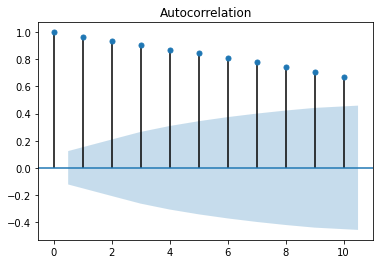

[1.         0.96362803 0.93613942 0.90580104 0.87160987 0.84406933
 0.81361114 0.78193596 0.74366141 0.70728267 0.67038575]


In [45]:
nlag = 10
result = acf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_acf(df['Open'], lags = nlag)
plt.show()
print(result)

# Partial Auto-Correlation (PACF)

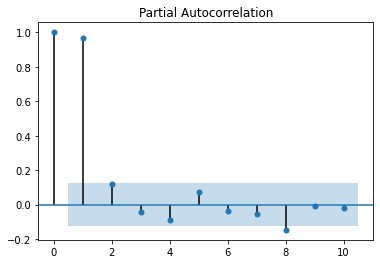

[ 1.          0.96745195  0.11923517 -0.04311809 -0.08979859  0.07107363
 -0.03394578 -0.05190971 -0.1465485  -0.00841333 -0.01970134]


In [46]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_pacf(df['Open'], lags = nlag)
plt.show()
print(result)